# Performance of UCT players

In this notebook we will analyze the performance of different UCT players. The training was done using the script `src/uct_iterated.py`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
log_files = !find ../logs -name "*.json"

In [3]:
df_nu100_ng50 = pd.read_json('../logs/short_logs_nu100_ng50.json')
df_nu20_ng50 = pd.read_json('../logs/short_logs_nu20_ng50.json')
df_nu50_ng50 = pd.read_json('../logs/short_logs_nu50_ng50.json')

In [4]:
df_nu50_ng50.head(2)

,round,mean_result,explored_moves,last_result,10-games-mean,elapsed_time
0,1,0.0,0,0.5,0.0,4.759
1,2,0.5,11710,0.5,0.5,6.642


In [5]:
df_nu100_ng50.head(2)

,round,mean_result,explored_moves,last_result,10-games-mean,elapsed_time
0,1,0.0,0,0.5,0.0,8.225
1,2,0.5,21480,0.5,0.5,11.636


In [6]:
df_nu20_ng50.head(2)

,round,mean_result,explored_moves,last_result,10-games-mean,elapsed_time
0,1,0.0,0,0.5,0.0,2.021
1,2,0.5,5660,0.5,0.5,4.850


## Results

### UTC vs Random Player

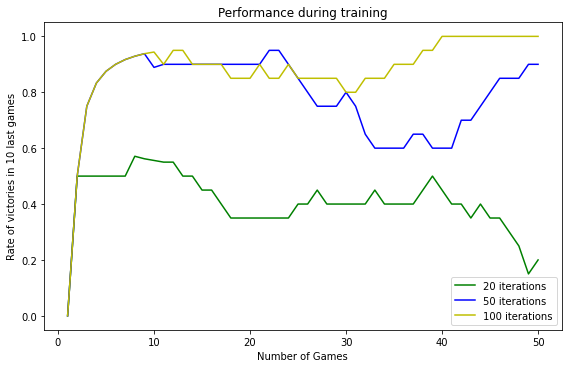

In [7]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Number of Games')

ax1.plot(df_nu20_ng50["round"].values, df_nu20_ng50["10-games-mean"].values, 'g-', label='20 iterations')
ax1.plot(df_nu50_ng50["round"].values, df_nu50_ng50["10-games-mean"].values, 'b-', label='50 iterations')
ax1.plot(df_nu100_ng50["round"].values, df_nu100_ng50["10-games-mean"].values, 'y-', label='100 iterations')

ax1.tick_params(axis='y')#, labelcolor=color)
#ax1.set_ylim([1.8, 3.9])
ax1.set_ylabel('Rate of victories in 10 last games')
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Performance during training')
plt.show()

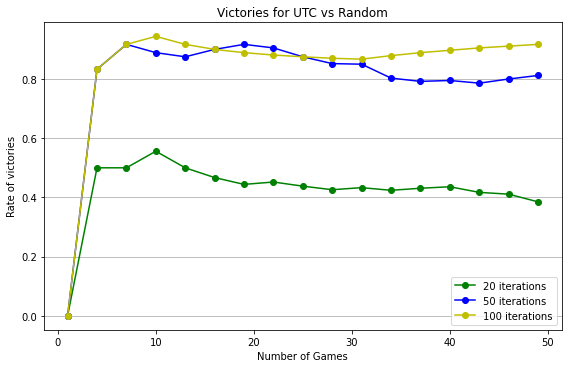

In [8]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Number of Games')

ax1.plot(df_nu20_ng50["round"].values[::3], df_nu20_ng50.mean_result.values[::3], 'go-', label='20 iterations')
ax1.plot(df_nu50_ng50["round"].values[::3], df_nu50_ng50.mean_result.values[::3], 'bo-', label='50 iterations')
ax1.plot(df_nu100_ng50["round"].values[::3], df_nu100_ng50.mean_result.values[::3], 'yo-', label='100 iterations')

ax1.tick_params(axis='y')#, labelcolor=color)
#ax1.set_ylim([1.8, 3.9])
ax1.set_ylabel('Rate of victories')
ax1.legend()
ax1.grid(axis='y')

#ax2 = ax1.twinx()
#ax2.plot(df_nu20_ng50.dropna()["round"].values[::3], df_nu20_ng50.dropna().elapsed_time.values[::3], 'gv--', label='20 iterations')
#ax2.plot(df_nu50_ng50.dropna()["round"].values[::3], df_nu50_ng50.dropna().elapsed_time.values[::3], 'bv--', label='50 iterations')
#ax2.plot(df_nu100_ng50.dropna()["round"].values[::3], df_nu100_ng50.dropna().elapsed_time.values[::3], 'yv--', label='100 iterations')

#ax2.tick_params(axis='y')#, labelcolor=color)
#ax2.set_ylabel('Elapsed time')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Victories for UTC vs Random')
plt.show()

### Elapsed time

In [9]:
with_time_20 = df_nu20_ng50.dropna()

In [10]:
with_time_20.shape

(49, 6)

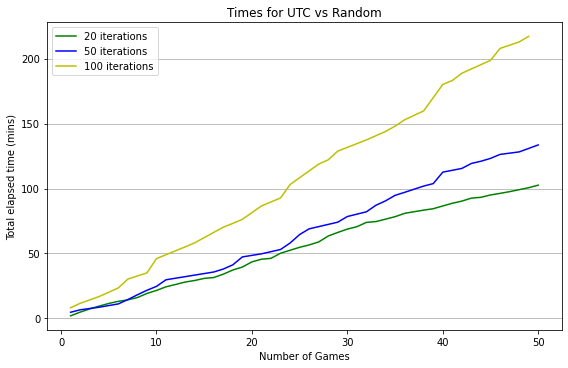

In [11]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Number of Games')

ax1.plot(df_nu20_ng50.dropna()["round"].values, df_nu20_ng50.dropna().elapsed_time.values, 'g-', label='20 iterations')
ax1.plot(df_nu50_ng50.dropna()["round"].values, df_nu50_ng50.dropna().elapsed_time.values, 'b-', label='50 iterations')
ax1.plot(df_nu100_ng50.dropna()["round"].values, df_nu100_ng50.dropna().elapsed_time.values, 'y-', label='100 iterations')

ax1.tick_params(axis='y')#, labelcolor=color)
#ax1.set_ylim([1.8, 3.9])
ax1.set_ylabel('Total elapsed time (mins)')
ax1.legend()
ax1.grid(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Times for UTC vs Random')
plt.show()

### UTC vs UTC games

In [12]:
df_04vs02 = pd.read_json('../logs/match_1_04vs02.json')
df_04vs_sqrt2 = pd.read_json('../logs/match_1_04vs_sqrt2.json')

In [13]:
df_04vs02.head()

,round,mean_result,explored_moves,last_result,10-games-mean
0,1,0.0,0,0.5,0.0
1,2,1.0,10908,1.0,1.0
2,3,1.0,19522,1.0,1.0
3,4,1.0,31362,1.0,1.0
4,5,1.0,37254,1.0,1.0


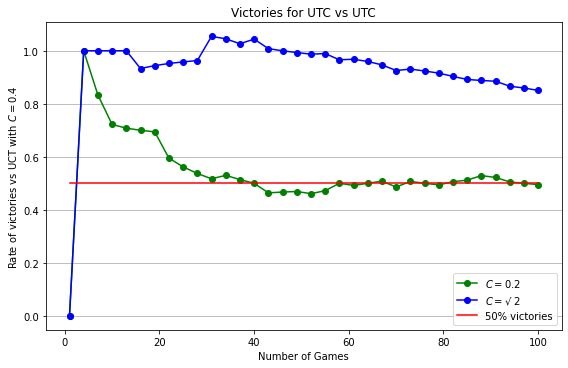

In [95]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Number of Games')

ax1.plot(df_04vs02["round"].values[::3], df_04vs02.mean_result.values[::3], 'go-', label=r'$C=0.2$')
ax1.plot(df_04vs_sqrt2["round"].values[::3], df_04vs_sqrt2.mean_result.values[::3], 'bo-', label='$C=$\u221A 2')
ax1.plot(
    df_04vs02["round"].values[::3],
    np.array([0.5 for i in range(len(df_04vs02["round"].values[::3]))]),
    'r-', label='50% victories')

ax1.tick_params(axis='y')
ax1.set_ylabel('Rate of victories vs UCT with $C=0.4$')
ax1.legend()
ax1.grid(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Victories for UTC vs UTC')
plt.show()